In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load Data

In [2]:
# load the data and print the desctiption
data = load_diabetes()
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
df = pd.DataFrame(data['data'], columns=data['feature_names']).assign(target=data['target'])

# EDA

### Summary Statistics

In [4]:
# quick lil 5 num summary
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


Based on the description as well as the output of `df.describe()` all features have been scaled via mean centering. We can see that the mean of each feature is centered at around ~ 0 while keeping the original distribution of the data. In addition, the standard deviation between all features look to be around the same value (~ -0.05) and the range looks to also be very similar. Given this, further transformation does not seem to be necessary; however, to further assess the need for transformations, we can look at the histograms of each individual feature.  

### Feature Distribution 

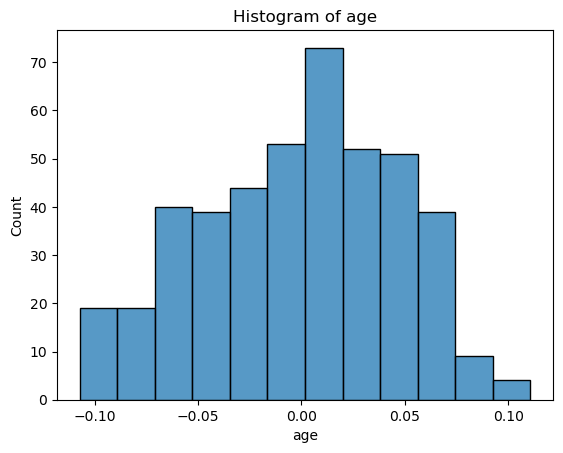

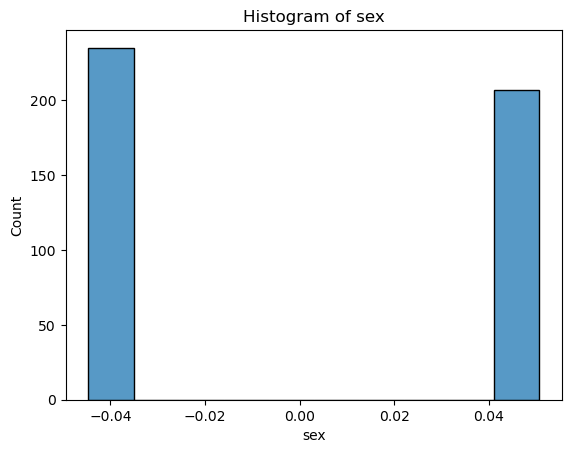

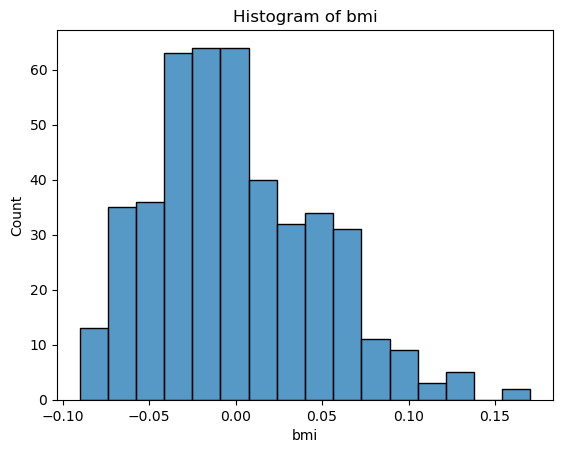

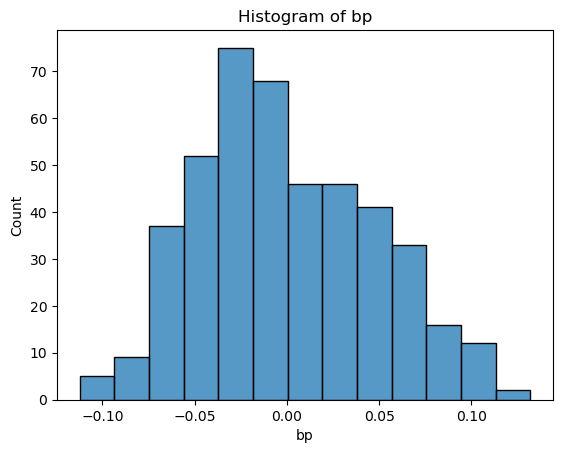

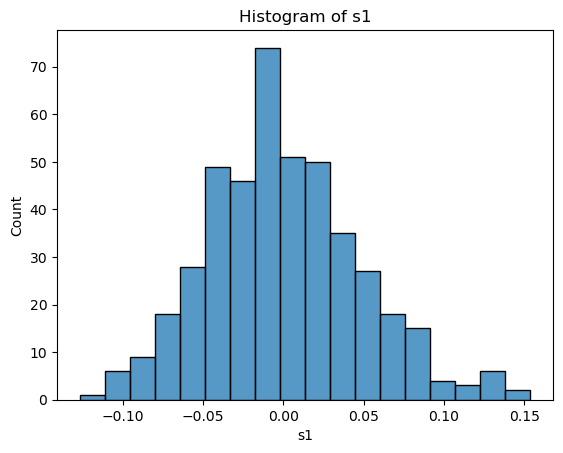

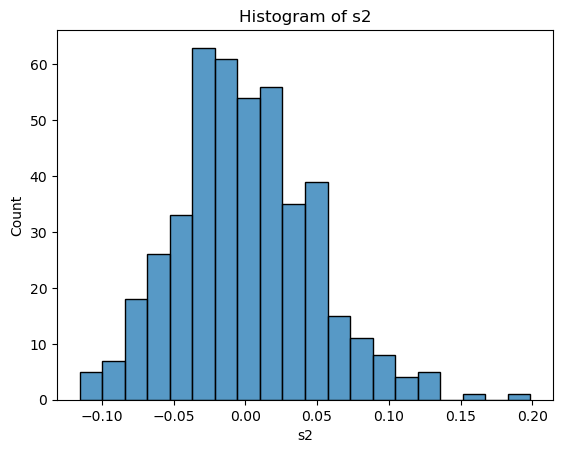

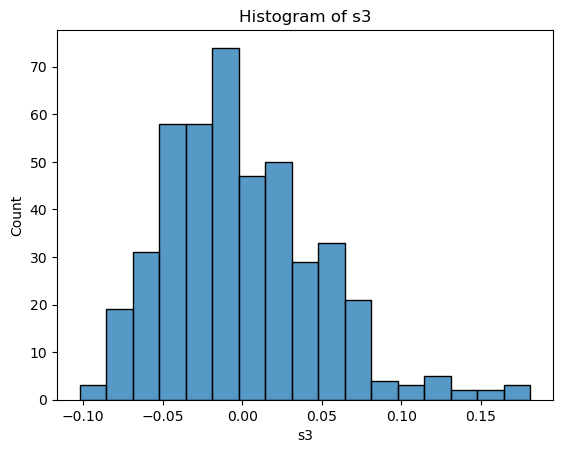

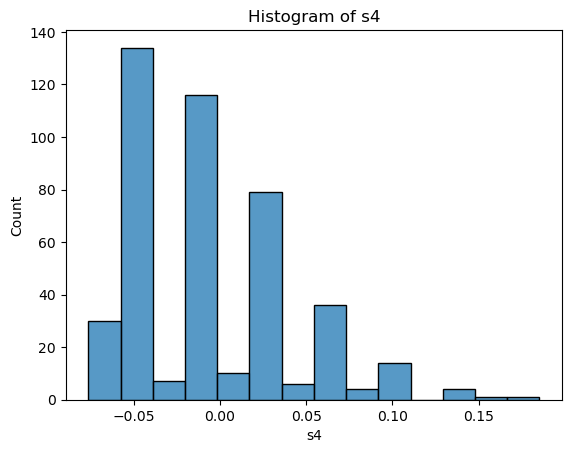

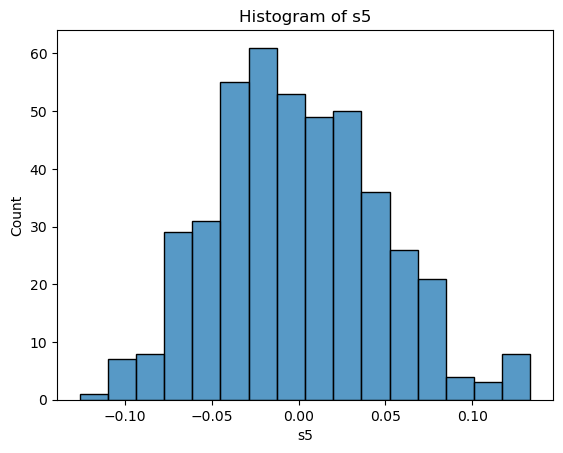

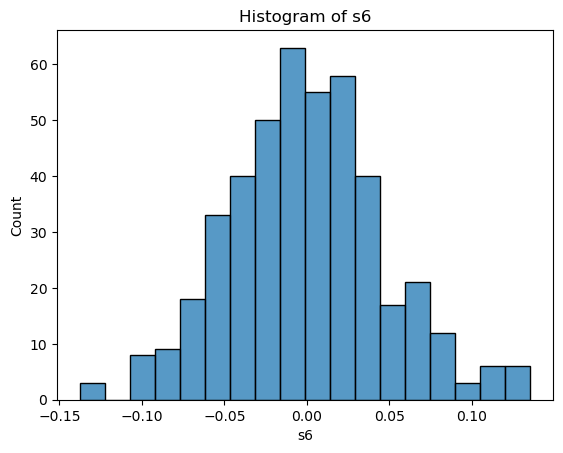

In [5]:
features = data['feature_names']
for feature in features:
    plt.figure()  
    sns.histplot(x=df[feature])
    plt.title(f'Histogram of {feature}')  
    plt.show() 

Looking at the given features, most of them are visually normal. We can do further statistical tests on normality (Shapiro-Wilk test, QQ-plots, etc.) but I will just stick to visual analysis. 

The normally distributed features look to be:
- age   
- bmi   
- bp 
- s1 (tc, total serum cholesterol)
- s2 (ldl, low-density lipoproteins)
- s5 (ltg, possibly log of serum triglycerides level)
- s6  (glu, blood sugar level)

Non-normal:
- sex
    - binomial?
- s3 (hdl, high-density lipoproteins) 
    - right skew?
- s4 (tch, total cholesterol / HDL)
    - right skew?

Overall, no extra pre-processing is needed to transform the distributions. 

In addition to the overall distribution, we can also inspect skew using `df.skew()`. A value of 0 means no skew, a positive value is right skew, and a negative skew is left skew. 

Given this, we'd expect age, s3, and s4 to have larger skew values.

In [6]:
df.skew().sort_values(ascending=False)

s3        0.799255
s4        0.735374
bmi       0.598148
target    0.440563
s2        0.436592
s1        0.378108
s5        0.291754
bp        0.290658
s6        0.207917
sex       0.127385
age      -0.231382
dtype: float64

Using `df.skew()`, s3 and s4 have the strongest right skew while age is the only value of with left skew. 


### Correlation Analysis 

We can now dive into mild correlation analysis between individual variables and the target via:
1. `sns.lmplot()` to plat a scatter/line plot
2. `df.corr()` to return the correlation coefficients

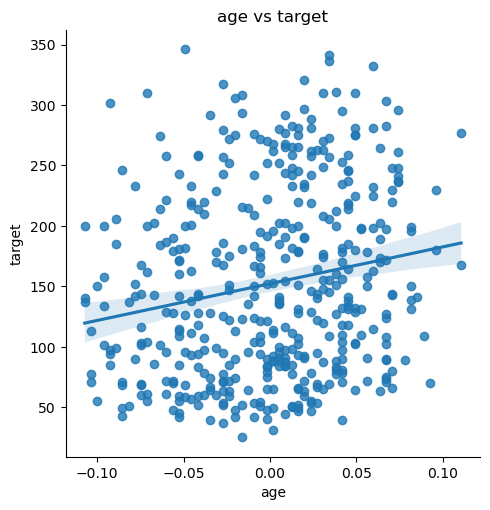

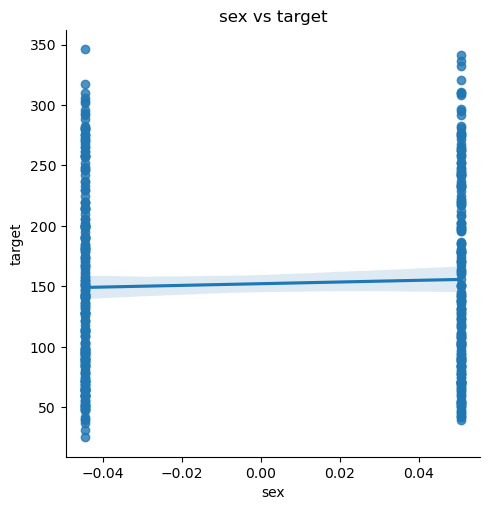

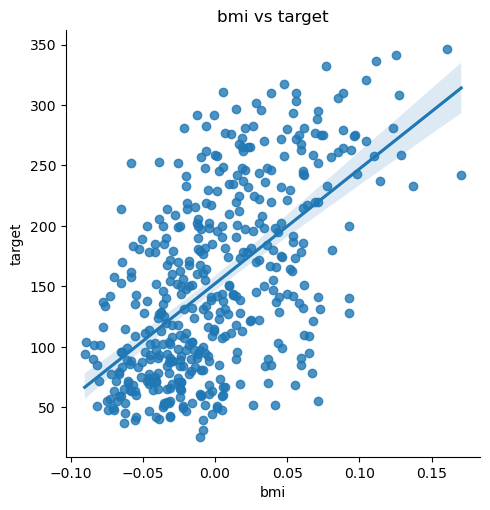

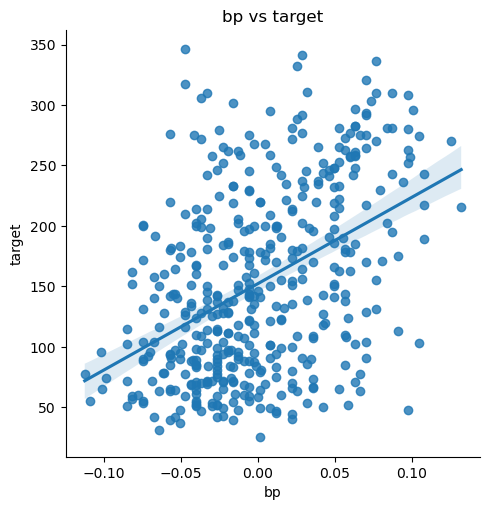

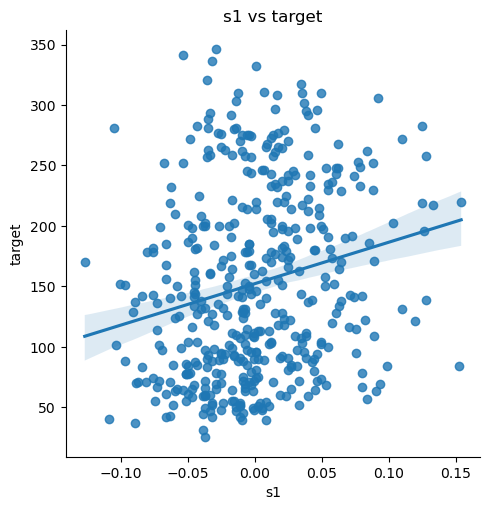

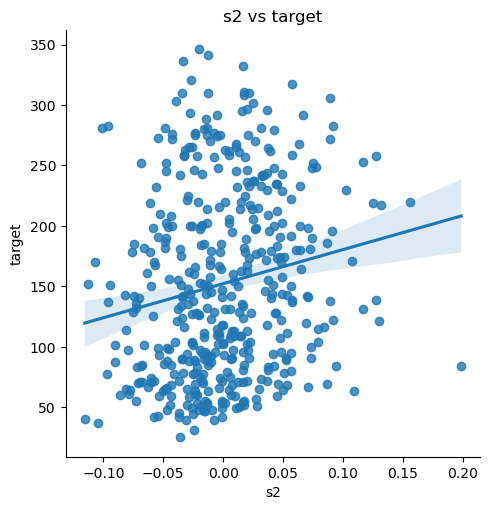

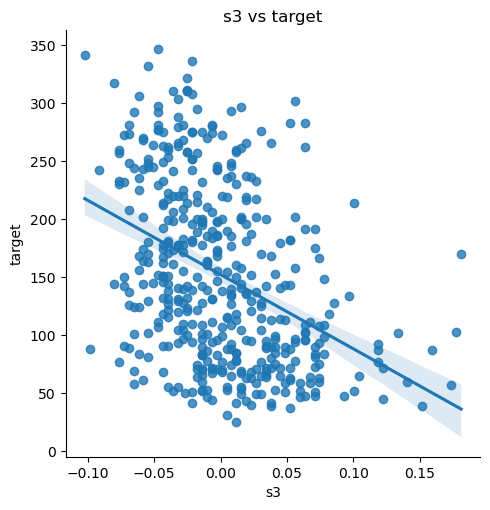

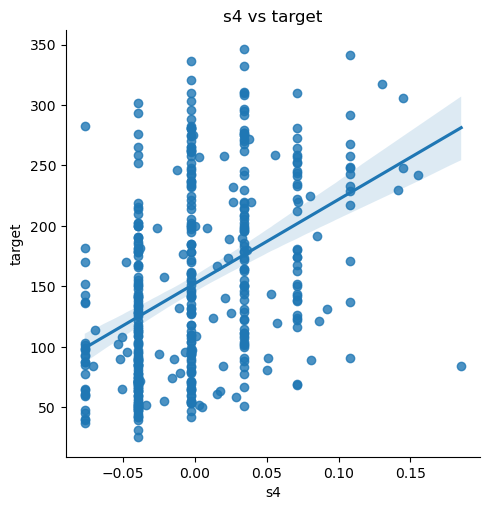

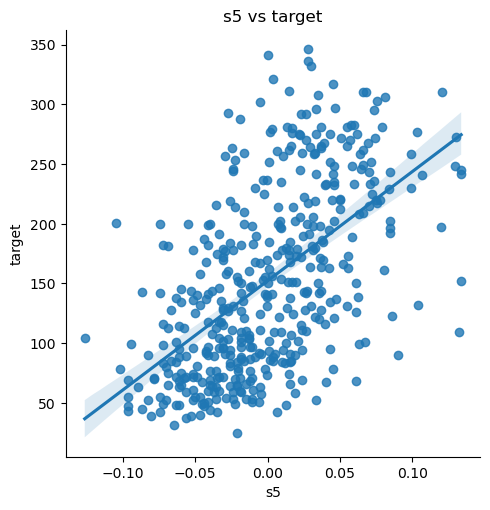

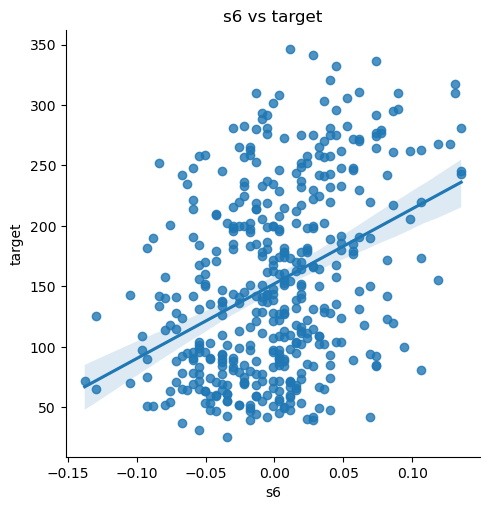

In [7]:
for feature in features:
    sns.lmplot(x=feature, y='target', data=df)
    plt.title(f'{feature} vs target')
    plt.show()

In [8]:
df.corr()['target'].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

Visually, bmi and blood pressure look to be the top contenders for the strongest correlation with the target. Looking at the correlation coefficeints, we can see that the top 3 strongest correlated features in order are:
1. bmi 
2. s5
3. bp

We will use bmi as the single feature for linear regression!

# Data Preprocessing


In [9]:
# create arrays and split data
X = df['bmi'].to_numpy().reshape(-1,1)
y = df['target'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=432)

In [10]:
# validate split
print(X_train.shape)
print(X_test.shape)

(353, 1)
(89, 1)


# Train

In [11]:
# train
model = LinearRegression(
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False
)

model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

pd.DataFrame({
    'y_test' : y_test,
    'y_pred' : y_pred,
})

,y_test,y_pred
0,196.0,178.171735
1,263.0,244.281026
2,202.0,148.789829
3,47.0,107.865030
4,168.0,142.493706
...,...,...
84,140.0,119.407922
85,155.0,145.641767
86,208.0,184.467858
87,212.0,168.727551


# Model Parameters / Performance Metrics

In [12]:
# model coefficeint
print(f'BMI Linear Model Slope: {model.coef_[0]:.2f}')
print(f'BMI Linear Model Y-Intercept: {model.intercept_:.2f}')

# RMSE (Root Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'BMI Linear Model RMSE: {rmse:.2f}')

BMI Linear Model Slope: 973.60
BMI Linear Model Y-Intercept: 152.73
BMI Linear Model RMSE: 61.18


In [13]:
# range of target variable
print(df['target'].max())
print(df['target'].min())

346.0
25.0


Given that the range of the target variable is [25, 346], an RMSE of 61.18 is relatively high. For this data, if the target of blood glucose level is in mg/dL, this RMSE can be interpreted as saying that on average, the model's predictions deviate from the true blood sugar levels (target) by about 61 mg/dL.

However, when comparing to the naive model of predicitng that the target value is just the average (aka calcualting the standard deviation of the target variables), we see that that model returns a standard deviation of ~77.1. This is a baseline value to compare the RMSE to. Since the RMSE of the linear regression (~61.2) is lower then the "naive model", we can say that the linear regression is better than that "baseline". 

# Plotting 

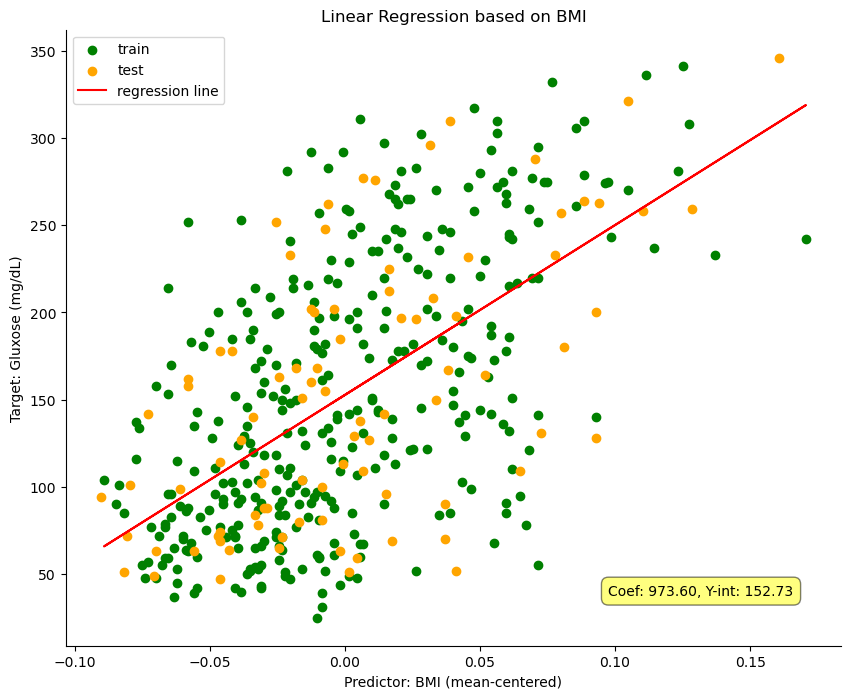

In [14]:
fig, ax = plt.subplots(figsize=(10,8))

# train n test scatterplot
ax.scatter(X_train, y_train, color='green', label='train')
ax.scatter(X_test, y_test, color='orange', label='test')

# linear regression line
X_line = X_train
y_line = X_train * model.coef_[0] + model.intercept_
plt.plot(X_line, y_line, color='red', label='regression line')

# make it pretty
plt.xlabel('Predictor: BMI (mean-centered)')
plt.ylabel('Target: Gluxose (mg/dL)')
plt.title('Linear Regression based on BMI')
plt.legend()

# for fun, add the coef / y-int to plot
annotation_text = f'Coef: {model.coef_[0]:.2f}, Y-int: {model.intercept_:.2f}'
plt.annotate(annotation_text, 
             xy=(0.7, 0.1), 
             xycoords='axes fraction',
             fontsize=10,
             ha='left', 
             va='top',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
             )

# remove spines for style
ax.spines[['right', 'top']].set_visible(False)

plt.show()

In [17]:
# output X_test, y_test, and y_pred
pd.DataFrame({
    'X_test': X_test.reshape(1,-1)[0],
    'y_test' : y_test,
    'y_pred' : y_pred,
}).sort_values(by='X_test', ascending=True)

,X_test,y_test,y_pred
19,-0.090275,94.0,64.841524
61,-0.081653,51.0,73.236354
65,-0.080575,72.0,74.285708
52,-0.079497,101.0,75.335062
43,-0.073030,142.0,81.631185
...,...,...,...
1,0.094031,263.0,244.281026
9,0.104809,321.0,254.774564
5,0.110198,258.0,260.021333
78,0.128521,259.0,277.860347


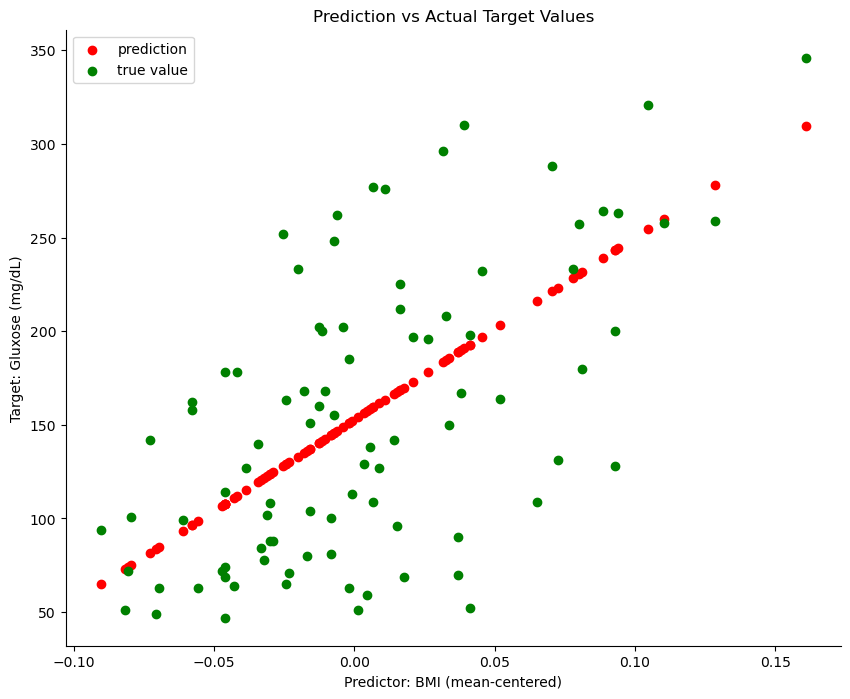

In [16]:
fig, ax = plt.subplots(figsize=(10,8))

# train n test scatterplot
ax.scatter(X_test, y_pred, color='red', label='prediction')
ax.scatter(X_test, y_test, color='green', label='true value')


# make it pretty
plt.xlabel('Predictor: BMI (mean-centered)')
plt.ylabel('Target: Gluxose (mg/dL)')
plt.title('Prediction vs Actual Target Values')
plt.legend()

# remove spines for style
ax.spines[['right', 'top']].set_visible(False)

plt.show()